In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

[deconv stackoverflow](https://stackoverflow.com/a/52436609)

[tensorflow imp link](https://www.guidetomlandai.com/tutorials/tensorflow/transpose-a-CNN-in-Tensoflow/)

[imp segmentation proj](https://github.com/cuevas1208/AI_notes/tree/master/07-Segmentation)

# experiment 0

In [2]:
ip = np.random.rand(4,4,3)
ip_ = np.array([ip])
ip_.shape

(1, 4, 4, 3)

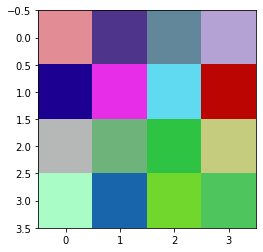

In [3]:
plt.imshow(ip)

W0910 15:16:26.818763 139774540867392 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 8, 8, 3)


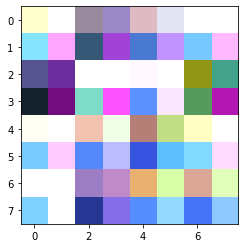

In [4]:
a = ip_
f =  np.random.rand(2,2,3,3) # this is weight

b = tf.nn.conv2d_transpose(a,
                           f,
                           output_shape=[1,8,8,3],
                           strides=[1,2,2,1],
                           padding='SAME')

with tf.Session() as sess:
    t = sess.run(b)
    print(t.shape)

plt.imshow(np.squeeze(t))

In [5]:
op_shape = 1,121,161,3

# experiment 1

In [6]:
import tensorflow as tf
import numpy as np

x1 = tf.ones(shape=[64, 7, 7, 256])
y1 = tf.layers.conv2d_transpose(x1, 128, 3, strides=2, padding='SAME')

w = tf.ones([3, 3, 128, 256])
y2 = tf.nn.conv2d_transpose(x1, w, output_shape=[64, 14, 14, 128], strides=[1, 2, 2, 1], padding='SAME')

x2 = tf.nn.conv2d(y2, w, strides=[1, 2, 2, 1], padding='SAME')

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    y1_value, y2_value, x2_value=sess.run([y1, y2, x2])
    print('downsample example')
    print(y1_value.shape)
    print(y2_value.shape)
    print(x2_value.shape)

tf.reset_default_graph()


image = tf.ones(shape=[64, 14, 14, 128])
w = tf.ones([3, 3, 128, 256])

x = tf.nn.conv2d(image, w, strides=[1, 3, 3, 1], padding='VALID')

y1 = tf.layers.conv2d_transpose(x, 128, kernel_size=3, strides=3, padding='VALID')
y2 = tf.nn.conv2d_transpose(x, w, output_shape=[64, 14, 14, 128], strides=[1, 3, 3, 1], padding='VALID')

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    x_value, y1_value, y2_value = sess.run([x, y1, y2])
    print('upsample example')
    print(x_value.shape)
    print(y1_value.shape)
    print(y2_value.shape)


W0910 15:16:27.246723 139774540867392 deprecation.py:323] From <ipython-input-6-1f49b56f6a83>:5: conv2d_transpose (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv2DTranspose` instead.
W0910 15:16:27.250373 139774540867392 deprecation.py:506] From /home/s/anaconda3/envs/ml/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


downsample example
(64, 14, 14, 128)
(64, 14, 14, 128)
(64, 7, 7, 256)
upsample example
(64, 4, 4, 256)
(64, 12, 12, 128)
(64, 14, 14, 128)


# Important point
[stackoverflow question](https://stackoverflow.com/questions/35488717/confused-about-conv2d-transpose/38059483)

keynote
--------
Since tf.nn.conv2d_transpose is the backward (gradient) counterpart of tf.nn.conv2d, one way to see what the correct shapes should be is to use the corresponding forward operation:

run the below cell and see the error

# final experiment

In [52]:
ip = np.random.rand(1,4,4,3)

f = np.random.rand(2,2,3,64)

conv_op = tf.nn.conv2d(ip,f,strides=[1,2,2,1], padding="SAME")

conv_trans_op = tf.nn.conv2d_transpose(conv_op,f,output_shape=ip.shape,strides=[1,2,2,1],padding="SAME")

with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    c_op = sess.run(conv_op)
    ct_op = sess.run(conv_trans_op)

print(ip.shape,c_op.shape,ct_op.shape)

(1, 4, 4, 3) (1, 2, 2, 64) (1, 4, 4, 3)


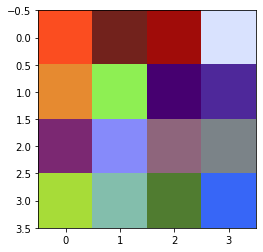

In [53]:
plt.imshow(np.squeeze(ip))

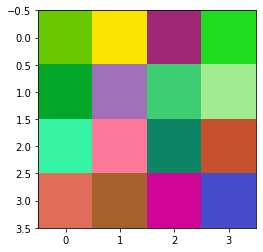

In [54]:
plt.imshow(np.squeeze((ct_op* 255).astype(np.uint8)))